In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import pickle
import seaborn as sns

from graspy.plot import heatmap

from simulations import rho_sbm_marg, rho_sbm_diff_block, rho_gaussian_sbm
from utils import sbm_params

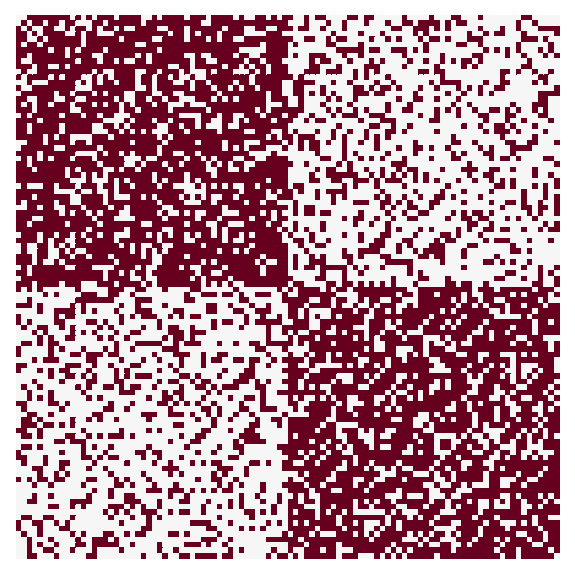

In [57]:
A, B = rho_sbm_marg(rho=0.1, k=2, AL=sbm_params(a=0.7, b=0.3), BL=sbm_params(a=0.2, b=0.5), n=100)
heatmap(A, cbar=False)
plt.savefig('../../figures/sbm_diff_marg1.png')

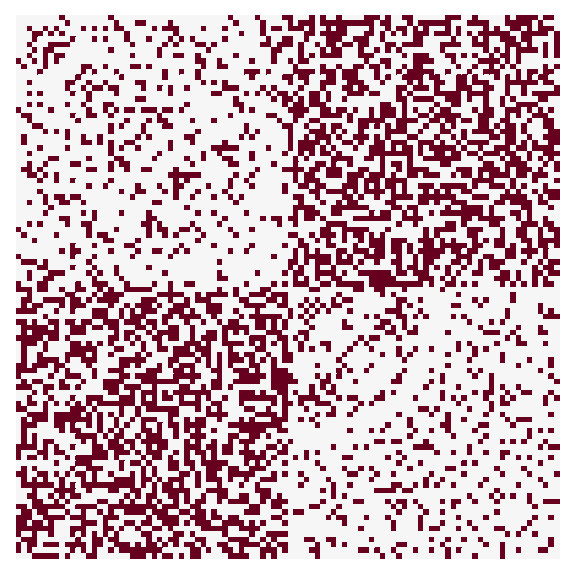

In [58]:
heatmap(B, cbar=False)
plt.savefig('../../figures/sbm_diff_marg2.png')

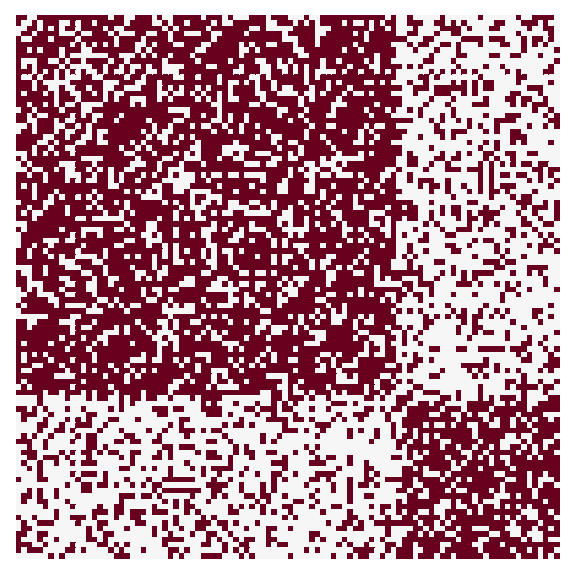

In [59]:
A, B = rho_sbm_diff_block(rho=0.1, k=[70, 30], AL=sbm_params(a=0.7, b=0.3), BL=sbm_params(a=0.2, b=0.5), n=100)
heatmap(A, cbar=False)
plt.savefig('../../figures/sbm_diff_block1.png')

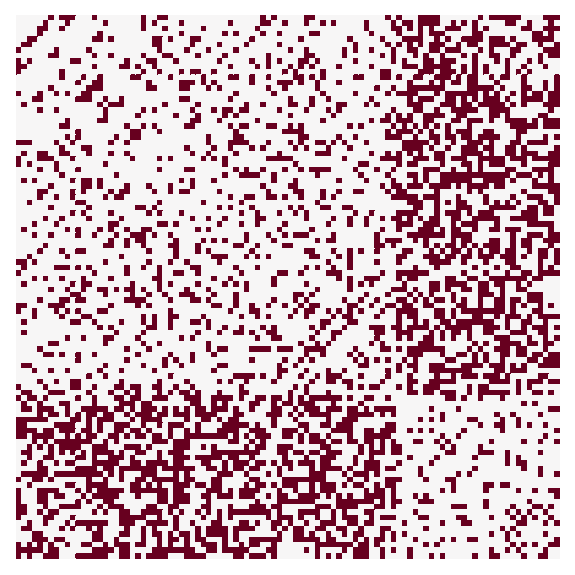

In [60]:
heatmap(B, cbar=False)
plt.savefig('../../figures/sbm_diff_block2.png')

In [63]:
AL = np.array([[2, 0], [0, 2]])
BL = np.array([[4, 2], [2, 4]])
A, B = rho_gaussian_sbm(rho=0.1, k=np.array([50, 50]), AL=AL, BL=BL, n=100)

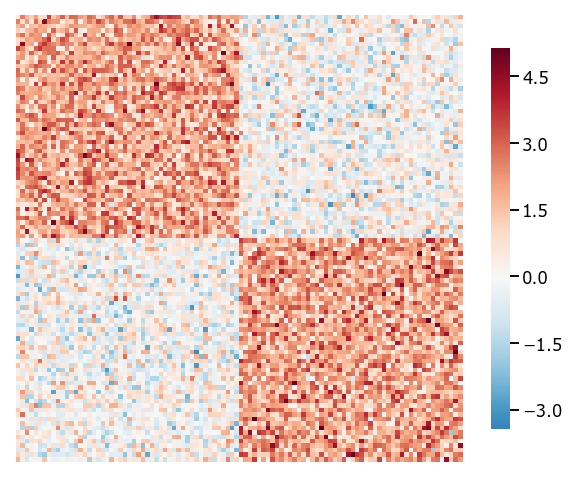

In [66]:
heatmap(A)
plt.savefig('../../figures/sbm_gaussian1.png')

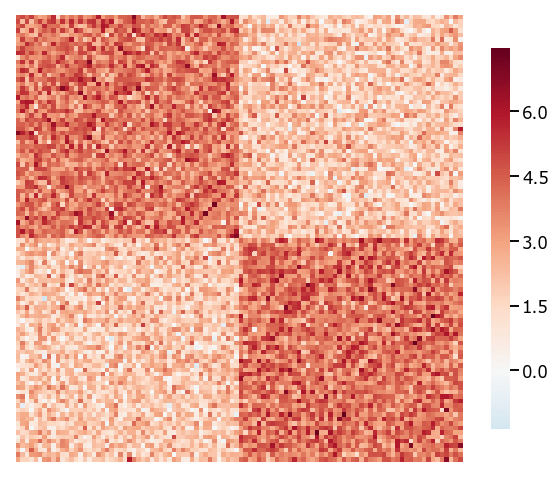

In [67]:
heatmap(B)
plt.savefig('../../figures/sbm_gaussian2.png')

In [7]:
n_arr = np.linspace(10, 100, 10, dtype=int)
#mpl.style.use('seaborn')

plt.figure(figsize=(8, 6))
colors = {
    'mgc': [0.6350, 0.0780, 0.1840],
    'dcorr': (0, 0.4470, 0.7410), 
    'pearson': 'orange',
    'ttest': 'green'
}

plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams["legend.fancybox"] = True
legend_size = 20
label_size = 20

linestyle = '-'
marker = 'o'

<Figure size 576x432 with 0 Axes>

/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing on

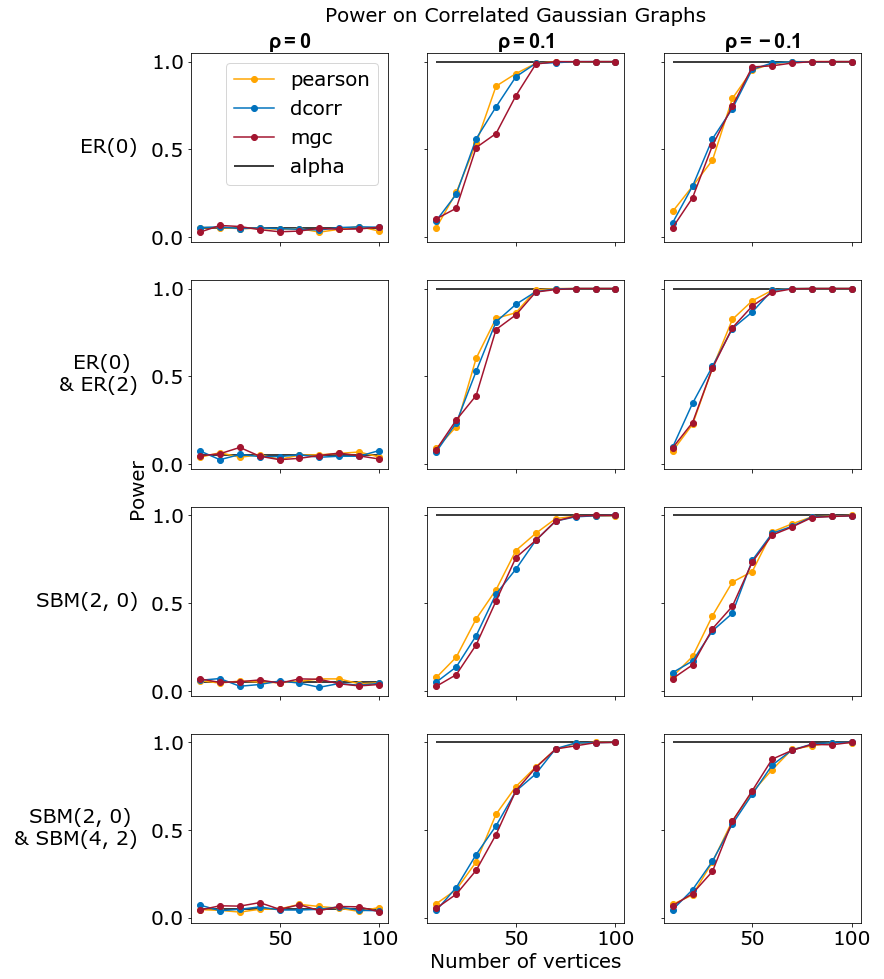

In [70]:
fig, axs = plt.subplots(4, 3, figsize=(12, 16), squeeze=True, sharex=True, sharey=True)
settings = ['er', 'er_marg', 'sbm', 'sbm_marg']
for i, setting in enumerate(settings):
    with open ('../../results/rho_gaussian_{}_power.pkl'.format(setting), 'rb') as f:
        power_results = pickle.load(f)
    for j in range(3):
        for name, test_power in power_results.items():
            axs[i, j].plot(n_arr, test_power[j, :], color=colors[name], linestyle=linestyle, 
                    marker=marker, label='{}'.format(name))
        if j == 0:
            axs[i, j].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
        else:
            axs[i, j].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='power=1')
        if i == 0 and j == 0:
            axs[i, j].legend(prop={'size': legend_size})


pad = 5 # in points
rows = ['ER(0)', 'ER(0) \n & ER(2)', 'SBM(2, 0)', 'SBM(2, 0) \n & SBM(4, 2)']
for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=label_size, ha='right', va='center')

cols = ['$\\rho=0$', '$\\rho=0.1$', '$\\rho=-0.1$']
for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=label_size, ha='center', va='baseline')
            
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Number of vertices", fontsize=label_size)
plt.ylabel("Power", fontsize=label_size)
#fig.tight_layout()
fig.suptitle('Power on Correlated Gaussian Graphs', fontsize=label_size, y=0.92)
plt.savefig('../../figures/all_power_gaussian.png', bbox_inches='tight')

/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing on

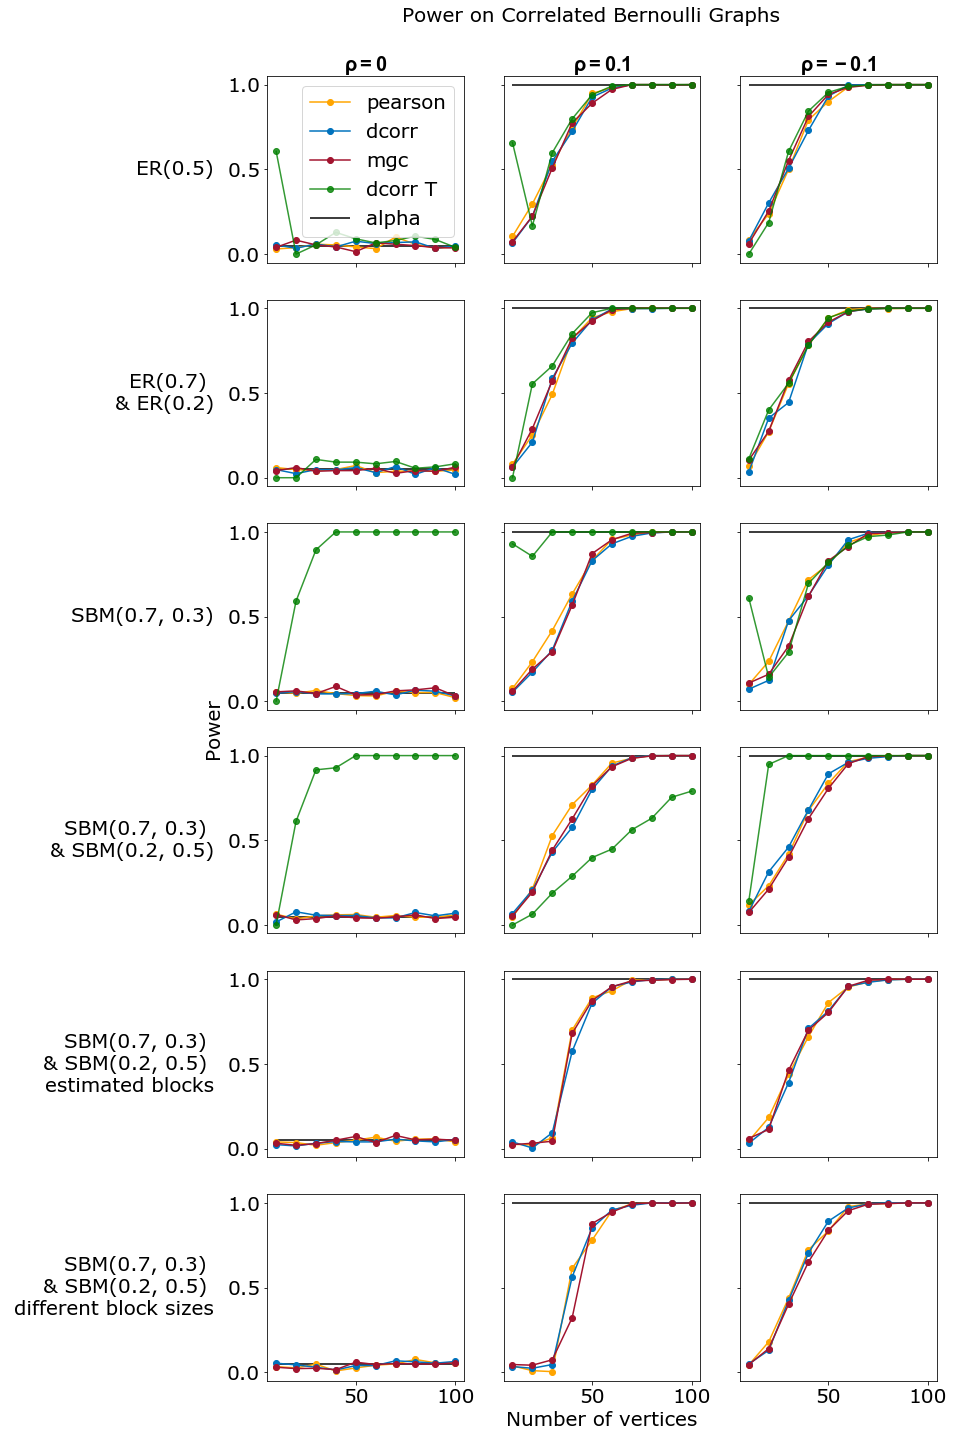

In [8]:
fig, axs = plt.subplots(6, 3, figsize=(12, 24), squeeze=True, sharex=True, sharey=True)
settings = ['er', 'er_marg', 'sbm', 'sbm_marg', 'sbm_marg_est_block', 'sbm_diff_block']
for i, setting in enumerate(settings):
    with open ('../../results/rho_{}_power_twosided.pkl'.format(setting), 'rb') as f:
        power_results = pickle.load(f)
    for j in range(3):
        for name, test_power in power_results.items():
            axs[i, j].plot(n_arr, test_power[j, :], color=colors[name], linestyle=linestyle, 
                    marker=marker, label='{}'.format(name))
        if i < 4:
            with open('../../results/rho_{}_power_ttest.pkl'.format(setting), 'rb') as f:
                test_power = pickle.load(f)
            axs[i, j].plot(n_arr, test_power[j, :], color=colors['ttest'], linestyle=linestyle, 
                    marker=marker, label='dcorr T', alpha=0.8)
        
        if j == 0:
            axs[i, j].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
        else:
            axs[i, j].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='power=1')
        if i == 0 and j == 0:
            axs[i, j].legend(prop={'size': legend_size})
        

pad = 5 # in points
rows = ['ER(0.5)', 'ER(0.7) \n & ER(0.2)', 'SBM(0.7, 0.3)', 'SBM(0.7, 0.3) \n & SBM(0.2, 0.5)', 
        'SBM(0.7, 0.3) \n & SBM(0.2, 0.5) \n estimated blocks', 
        'SBM(0.7, 0.3) \n & SBM(0.2, 0.5) \n different block sizes']
for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=label_size, ha='right', va='center')

cols = ['$\\rho=0$', '$\\rho=0.1$', '$\\rho=-0.1$']
for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=label_size, ha='center', va='baseline')

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Number of vertices", fontsize=label_size)
plt.ylabel("Power", fontsize=label_size)
#fig.tight_layout()
fig.suptitle('Power on Correlated Bernoulli Graphs', fontsize=label_size, y=0.92)
#plt.savefig('../../figures/all_power.png', bbox_inches='tight')
plt.savefig('../../figures/all_power_ttest.png', bbox_inches='tight')

/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing on

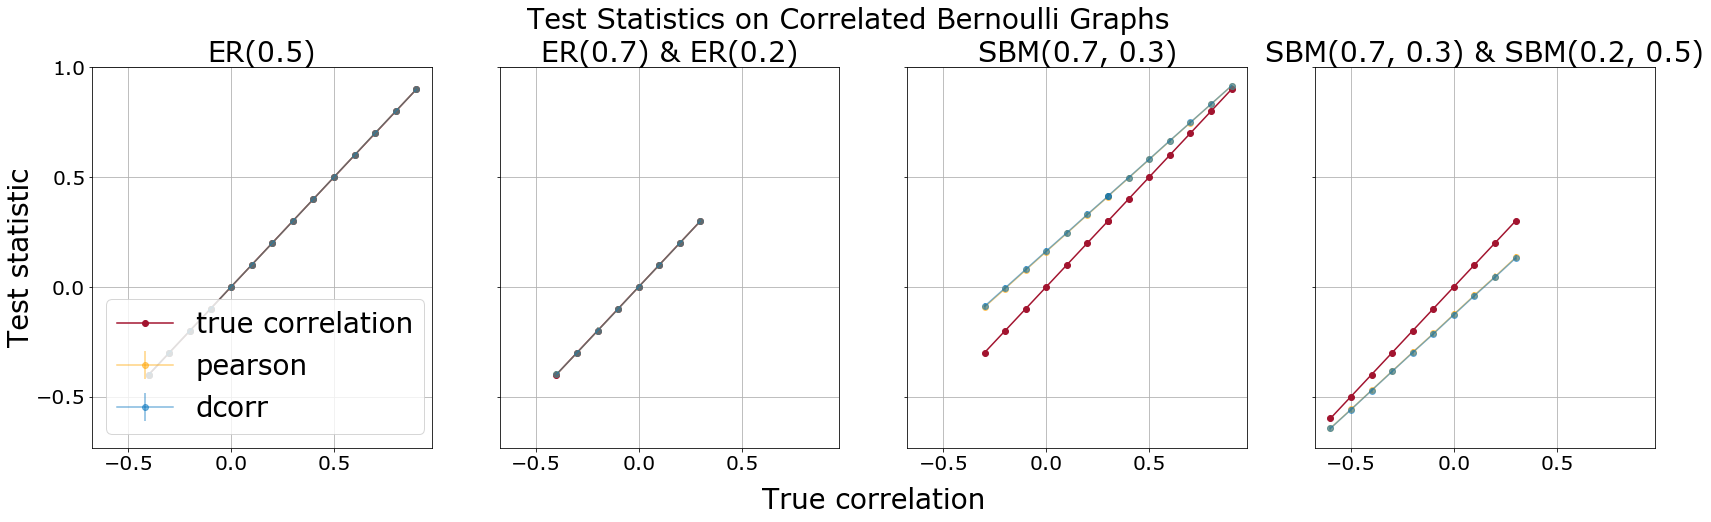

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(28, 7), squeeze=True, sharex=True, sharey=True)
axs = axs.reshape(-1)
test_names = ['pearson', 'dcorr']
xmin = -0.5
xmax = 1
ymin = -0.5
ymax = 1
alpha = 0.5
colors = {
    'true': [0.6350, 0.0780, 0.1840],
    'dcorr': (0, 0.4470, 0.7410), 
    'pearson': 'orange',
}
plt.rcParams['xtick.labelsize']=28
plt.rcParams['ytick.labelsize']=28
plt.rcParams["legend.fancybox"] = True
legend_size = 28
label_size = 28

with open('../../results/rho_er_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
rho_arr = np.around(np.linspace(-0.4, 0.9, 14), 1)
axs[0].plot(rho_arr, rho_arr, label='true correlation', marker='o', linestyle=linestyle, color=colors['true'])
for name in test_names:
    axs[0].errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle=linestyle, label='{}'.format(name), alpha=alpha, color=colors[name])
    #axs[0].hlines(y=0, xmin=xmin, xmax=xmax)
    #axs[0].vlines(x=0, ymin=ymin, ymax=ymax)
    axs[0].legend(prop={'size': legend_size})
    axs[0].set_title('ER(0.5)', fontsize=label_size)
axs[0].grid()
    
with open('../../results/rho_er_marg_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
rho_arr = np.around(np.linspace(-0.4, 0.3, 8), 1)
axs[1].plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle=linestyle, color=colors['true'])
for name in test_names:
    axs[1].errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle=linestyle, label='{}'.format(name), alpha=alpha, color=colors[name])
    #axs[1].hlines(y=0, xmin=xmin, xmax=xmax)
    #axs[1].vlines(x=0, ymin=ymin, ymax=ymax)
    axs[1].set_title('ER(0.7) & ER(0.2)', fontsize=label_size)
axs[1].grid()

    
with open('../../results/rho_sbm_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
rho_arr = np.around(np.linspace(-0.3, 0.9, 14), 1)
axs[2].plot(rho_arr, rho_arr, label='true correlation', marker='o', linestyle=linestyle, color=colors['true'])
for name in test_names:
    axs[2].errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle=linestyle, label='{}'.format(name), alpha=alpha, color=colors[name])
    #axs[2].hlines(y=0, xmin=xmin, xmax=xmax)
    #axs[2].vlines(x=0, ymin=ymin, ymax=ymax)
    axs[2].set_title('SBM(0.7, 0.3)', fontsize=label_size)
axs[2].grid()

with open('../../results/rho_sbm_marg_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
axs[3].plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle=linestyle, color=colors['true'])
for name in test_names:
    axs[3].errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle=linestyle, label='{}'.format(name), alpha=alpha, color=colors[name])
    #axs[3].hlines(y=0, xmin=xmin, xmax=xmax)
    #axs[3].vlines(x=0, ymin=ymin, ymax=ymax)
    axs[3].set_title('SBM(0.7, 0.3) & SBM(0.2, 0.5)', fontsize=label_size)
axs[3].grid()
    
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
#fig.tight_layout()

# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("True correlation", fontsize=label_size)
plt.ylabel("Test statistic", fontsize=label_size)
fig.suptitle('Test Statistics on Correlated Bernoulli Graphs', fontsize=label_size, y=1)

plt.savefig('../../figures/all_teststats.png', bbox_inches='tight')